<a href="https://colab.research.google.com/github/blondedman/clustering-comparisons/blob/main/clustering_spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spectral Clustering

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [16]:
data = pd.read_csv('online_shoppers_intention.csv')

In [17]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Necessary Data Preprocessing

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder1 = LabelEncoder()
data['Weekend'] = encoder1.fit_transform(data['Weekend'])
data['Revenue'] = encoder1.fit_transform(data['Revenue'])

encoder2 = LabelEncoder()
data['VisitorType'] = encoder2.fit_transform(data['VisitorType'])

encoder3 = OneHotEncoder()
data['Month'] = encoder2.fit_transform(data['Month'])

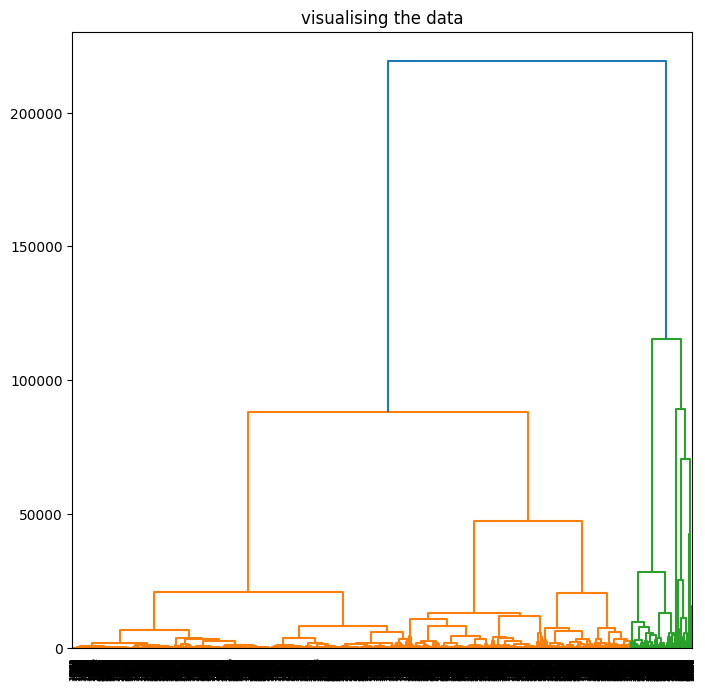

In [19]:
plt.figure(figsize =(8, 8))
plt.title('visualising the data')
dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

# Additional Data Preprocessing


## No Data Preprocessing

In [9]:
models = [SpectralClustering(n_clusters = 3, affinity = 'nearest_neighbors'),
          SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors'),
          SpectralClustering(n_clusters = 7, affinity = 'nearest_neighbors')]

clusters = [3, 5, 7]

In [11]:
for i in range(len(models)):
  labels = models[i].fit_predict(data)
  print(f'Silhouette Score: {silhouette_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.3014939891562793 for number of clusters: 3
Davies-Bouldin Score: 0.6847163760794986 for number of clusters: 3
Calinski-Harabasz Score: 8173.916443844546 for number of clusters: 3

Silhouette Score: 0.267380667741224 for number of clusters: 5
Davies-Bouldin Score: 0.6484243891981152 for number of clusters: 5
Calinski-Harabasz Score: 9152.12495512412 for number of clusters: 5

Silhouette Score: 0.3268900294298199 for number of clusters: 7
Davies-Bouldin Score: 0.6833347052769009 for number of clusters: 7
Calinski-Harabasz Score: 8791.854625681968 for number of clusters: 7



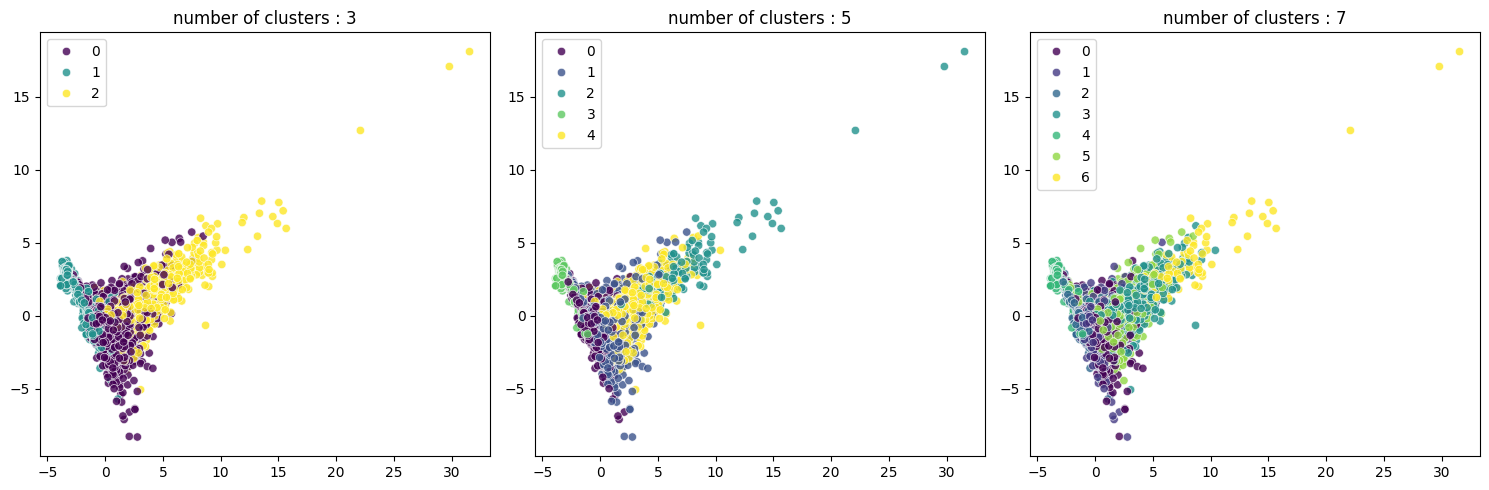

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Standardization & PCA

In [20]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

pca = PCA(n_components = 2)
new_data = pca.fit_transform(new_data)

In [21]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.3843314052098129 for number of clusters: 3
Davies-Bouldin Score: 0.8398869924172411 for number of clusters: 3
Calinski-Harabasz Score: 5756.386264190519 for number of clusters: 3

Silhouette Score: 0.3457219794268918 for number of clusters: 5
Davies-Bouldin Score: 0.7783393809550451 for number of clusters: 5
Calinski-Harabasz Score: 7521.685669963979 for number of clusters: 5

Silhouette Score: 0.31821939210940475 for number of clusters: 7
Davies-Bouldin Score: 0.763912161474413 for number of clusters: 7
Calinski-Harabasz Score: 7539.34468329092 for number of clusters: 7



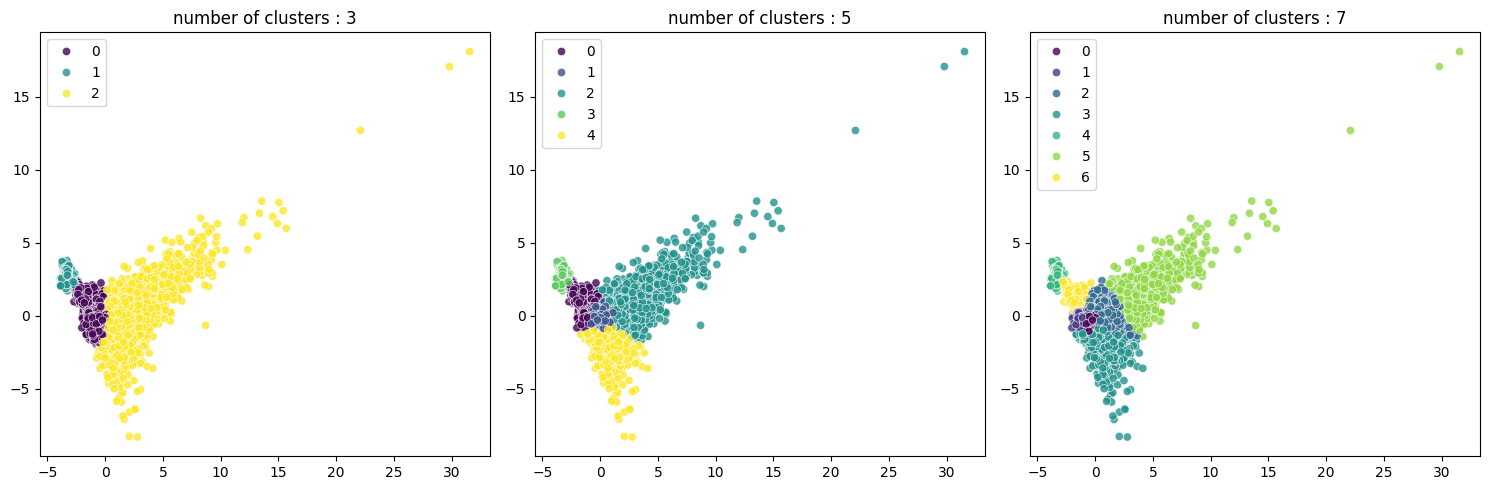

In [22]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = new_data[:, 0], y = new_data[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Min-Max Scaling & Outlier removal

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_data = scaler.fit_transform(new_data)

In [25]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.08647060098412128 for number of clusters: 3
Davies-Bouldin Score: 2.560599549776592 for number of clusters: 3
Calinski-Harabasz Score: 120.70251054954775 for number of clusters: 3

Silhouette Score: 0.09788124207265607 for number of clusters: 5
Davies-Bouldin Score: 1.932187456940835 for number of clusters: 5
Calinski-Harabasz Score: 154.73279431544017 for number of clusters: 5

Silhouette Score: 0.1447454111706413 for number of clusters: 7
Davies-Bouldin Score: 1.618330669092348 for number of clusters: 7
Calinski-Harabasz Score: 177.69942610897613 for number of clusters: 7



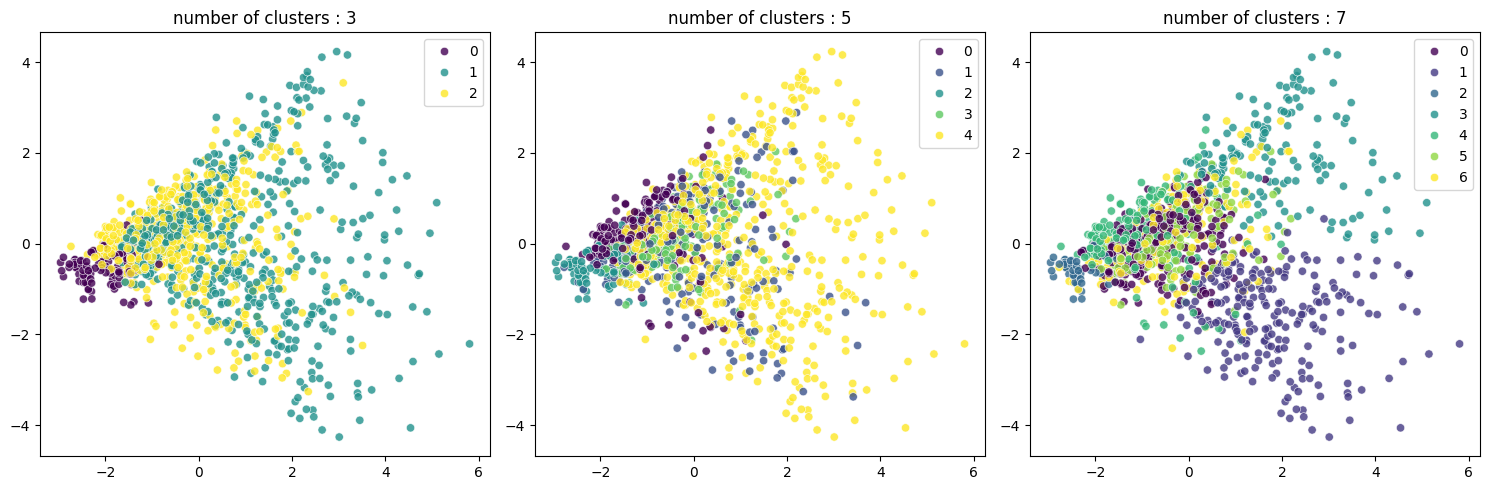

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Log Transformation & Normalization

In [27]:
new_data = np.log1p(data + 1)

In [28]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
new_data = normalizer.fit_transform(new_data)

In [29]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette score: 0.35206357786872383 for number of clusters: 3
Davies-Bouldin score: 0.9949557671849859 for number of clusters: 3
Calinski-Harabasz score: 6051.609250585526 for number of clusters: 3

Silhouette score: 0.3365166030498716 for number of clusters: 5
Davies-Bouldin score: 1.0363901587573023 for number of clusters: 5
Calinski-Harabasz score: 5441.1490482048775 for number of clusters: 5

Silhouette score: 0.3186306530869976 for number of clusters: 7
Davies-Bouldin score: 1.1125404247322996 for number of clusters: 7
Calinski-Harabasz score: 4767.6653788252415 for number of clusters: 7



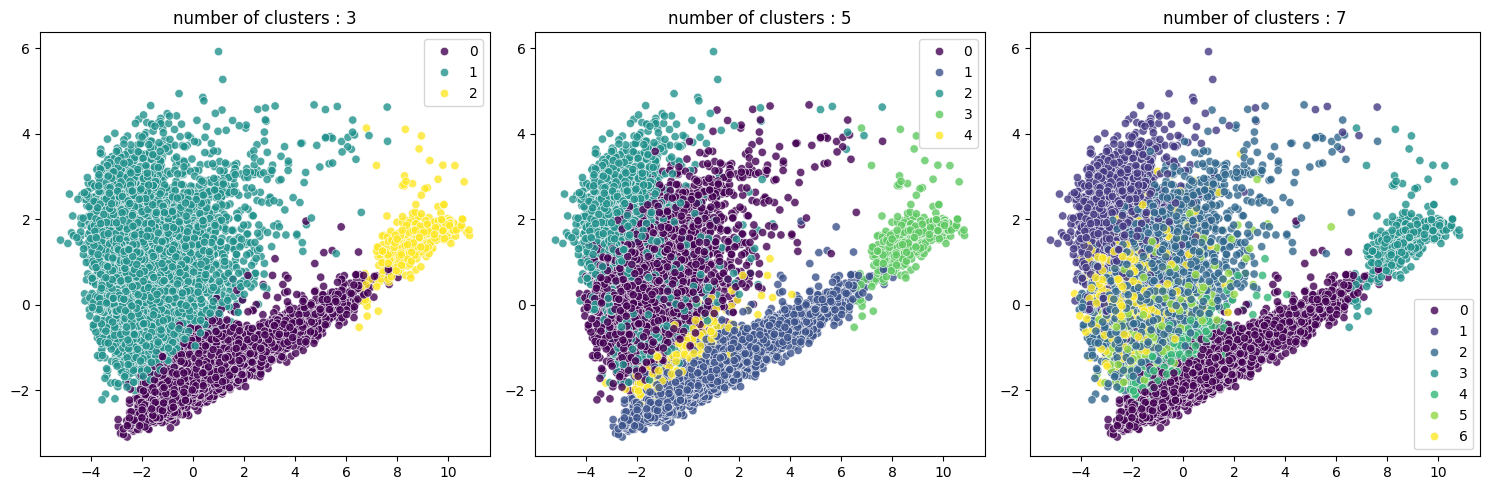

In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Feature Selection & Discretization

In [31]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold = 0.01)
new_data = var_thresh.fit_transform(data)

In [32]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
new_data = discretizer.fit_transform(new_data)

In [34]:
models2 = [SpectralClustering(n_clusters = 3, affinity = 'rbf'),
          SpectralClustering(n_clusters = 5, affinity = 'rbf'),
          SpectralClustering(n_clusters = 7, affinity = 'rbf')]

for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: -0.152889055465944 for number of clusters: 3
Davies-Bouldin Score: 1.123547716409224 for number of clusters: 3
Calinski-Harabasz Score: 86.10705175278369 for number of clusters: 3



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: -0.07543506485062924 for number of clusters: 5
Davies-Bouldin Score: 1.5258935648124585 for number of clusters: 5
Calinski-Harabasz Score: 708.7166533049211 for number of clusters: 5



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: 0.008977455409528079 for number of clusters: 7
Davies-Bouldin Score: 1.3546951381332337 for number of clusters: 7
Calinski-Harabasz Score: 922.0840668927002 for number of clusters: 7



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


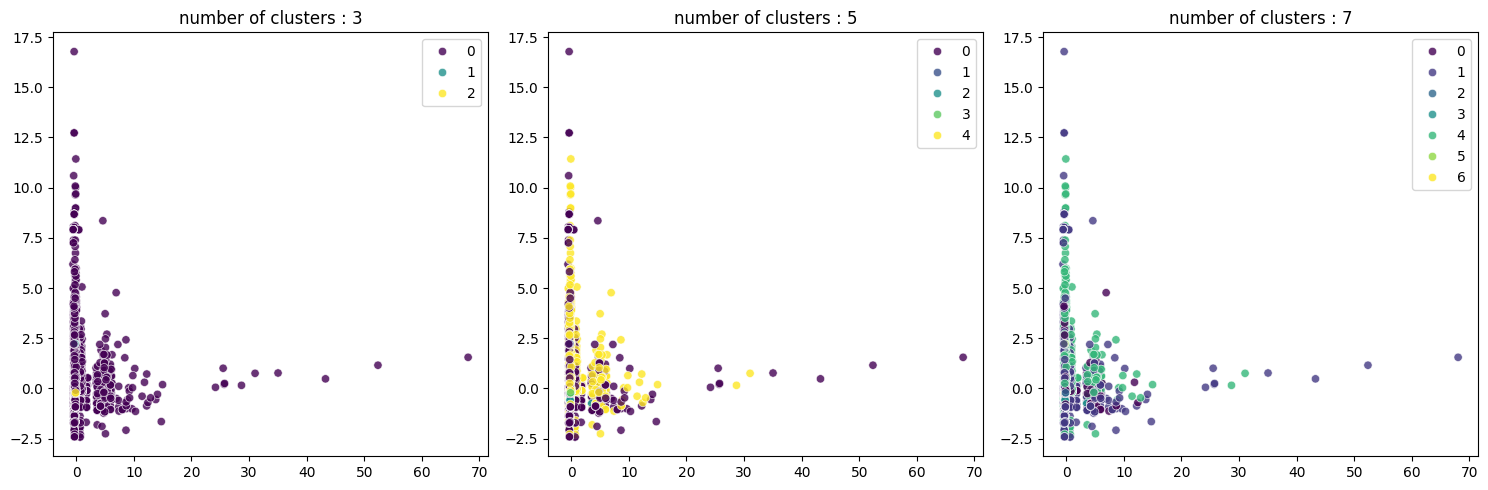

In [37]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()

## Robust Scaling & Feature Engineering

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
new_data = scaler.fit_transform(data)

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
new_data = poly.fit_transform(new_data)

In [40]:
for i in range(len(models)):
  labels = models[i].fit_predict(new_data)
  print(f'Silhouette Score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin Score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz Score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'')

Silhouette Score: 0.7145826255784267 for number of clusters: 3
Davies-Bouldin Score: 1.087959894016371 for number of clusters: 3
Calinski-Harabasz Score: 4176.576091506253 for number of clusters: 3

Silhouette Score: 0.36372581936655507 for number of clusters: 5
Davies-Bouldin Score: 1.0541453841873707 for number of clusters: 5
Calinski-Harabasz Score: 4230.104262276564 for number of clusters: 5

Silhouette Score: 0.5055490265108877 for number of clusters: 7
Davies-Bouldin Score: 0.9686331916386728 for number of clusters: 7
Calinski-Harabasz Score: 3624.4341343984365 for number of clusters: 7



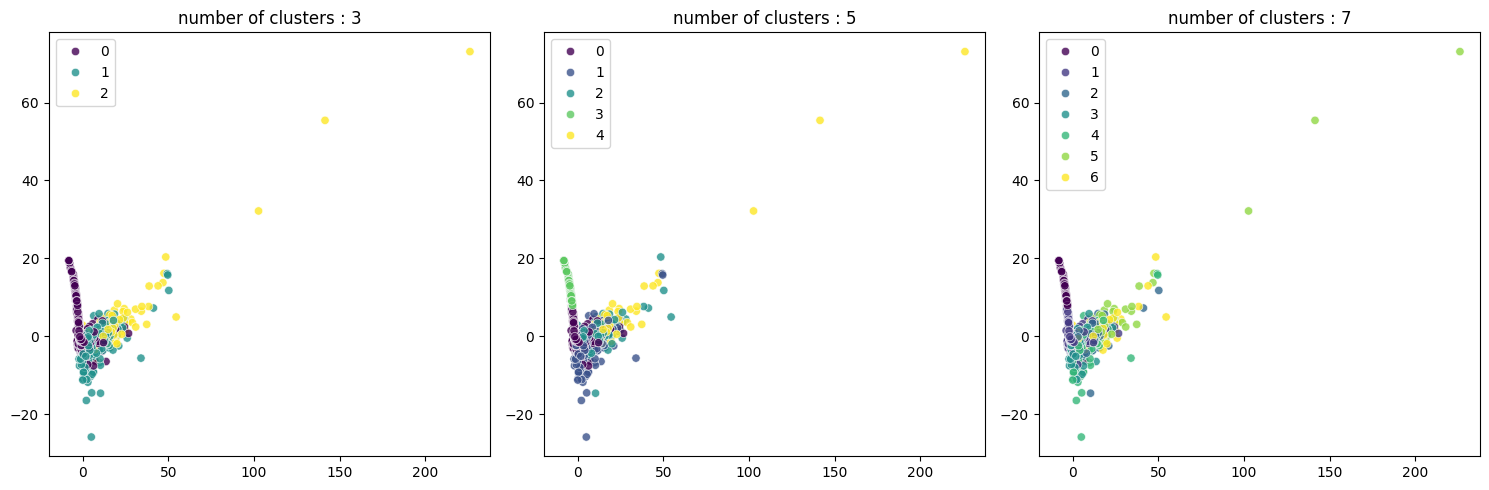

In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

for i, k in enumerate(clusters):
  labels = models[i].fit_predict(new_data)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'number of clusters : {k}')

plt.tight_layout()
plt.show()